<a href="https://colab.research.google.com/github/Ash2809/Flipkart-CSAT-Scores/blob/main/Model_traning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
 #Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
# Load Data
df = pd.read_csv("/content/drive/MyDrive/Flipkart Analysis/Customer_support_data.csv")
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [12]:
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


In [13]:
df.duplicated().sum()


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [16]:
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


In [3]:
# Data Cleaning & Preprocessing
df.drop(columns=['connected_handling_time', 'Customer_City', 'Product_category',
                'Item_price', 'order_date_time', 'Customer Remarks'], inplace=True)

df.dropna(subset=['Order_id'], inplace=True)

df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce')
df['Response_Time_Min'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

df.drop(columns=['Unique id', 'Issue_reported at', 'issue_responded',
                 'Survey_response_Date', 'Order_id'], inplace=True)


In [4]:
# Encode Categorical Columns
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.dropna(subset=['Response_Time_Min'], inplace=True)


#EDA

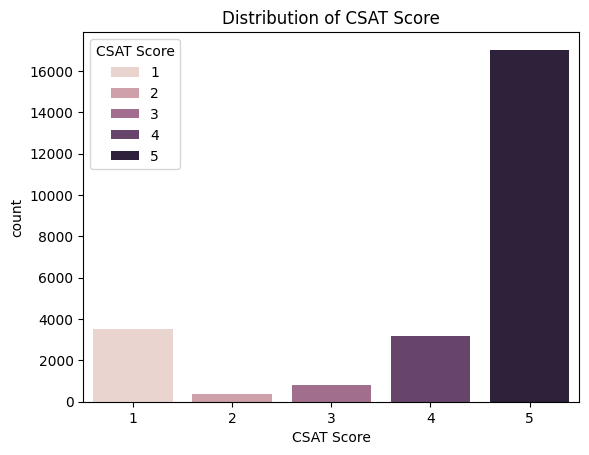

In [ ]:
# CSAT Score Distribution - Countplot
sns.countplot(x='CSAT Score', data=df, hue ="CSAT Score")
plt.title("Distribution of CSAT Score")
plt.show()

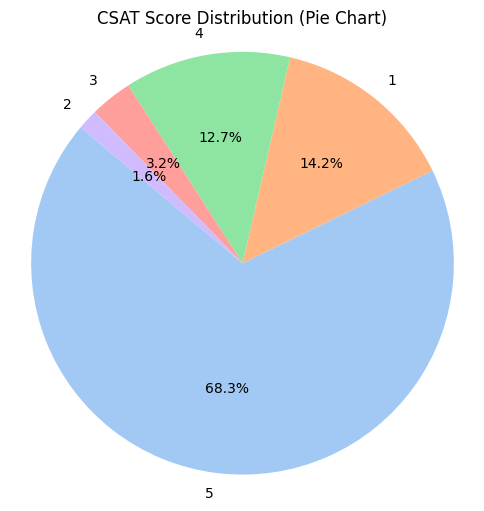

In [ ]:
# Pie Chart for CSAT Score Distribution
csat_counts = df['CSAT Score'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(csat_counts, labels=csat_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("CSAT Score Distribution (Pie Chart)")
plt.axis('equal')
plt.show()

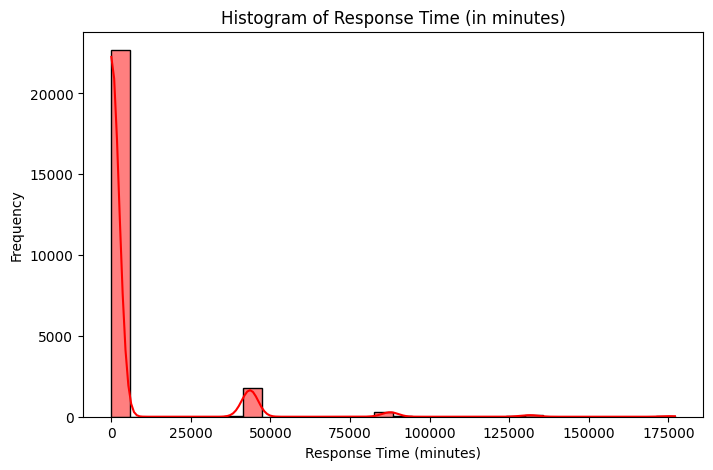

In [ ]:
# Histogram for Response Time
plt.figure(figsize=(8, 5))
sns.histplot(df['Response_Time_Min'], bins=30, kde=True, color='red')
plt.title("Histogram of Response Time (in minutes)")
plt.xlabel("Response Time (minutes)")
plt.ylabel("Frequency")
plt.show()

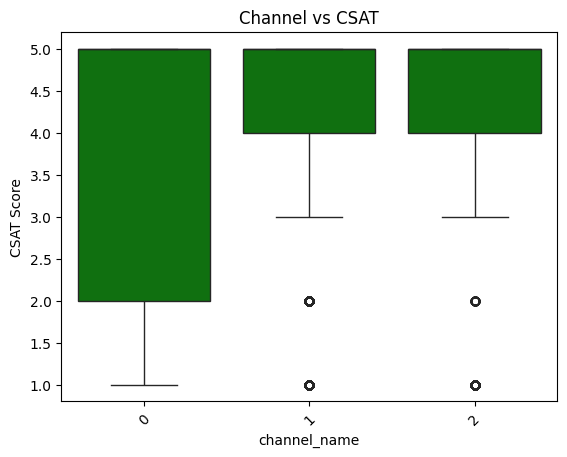

In [ ]:
# Boxplot: Channel vs CSAT
sns.boxplot(x='channel_name', y='CSAT Score', data=df, color='green')
plt.xticks(rotation=45)
plt.title("Channel vs CSAT")
plt.show()

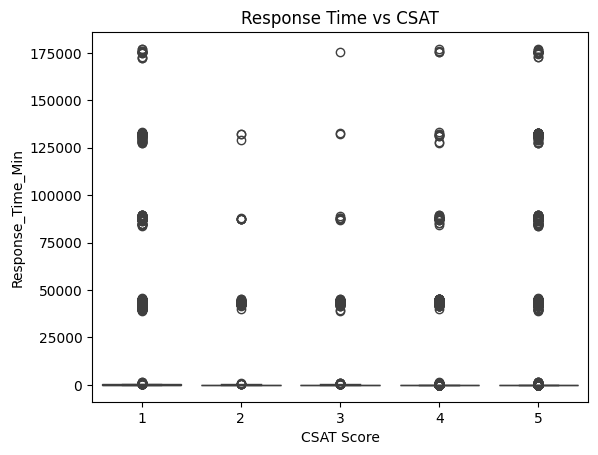

In [ ]:
# Boxplot: Response Time vs CSAT
sns.boxplot(x='CSAT Score', y='Response_Time_Min', data=df)
plt.title("Response Time vs CSAT")
plt.show()

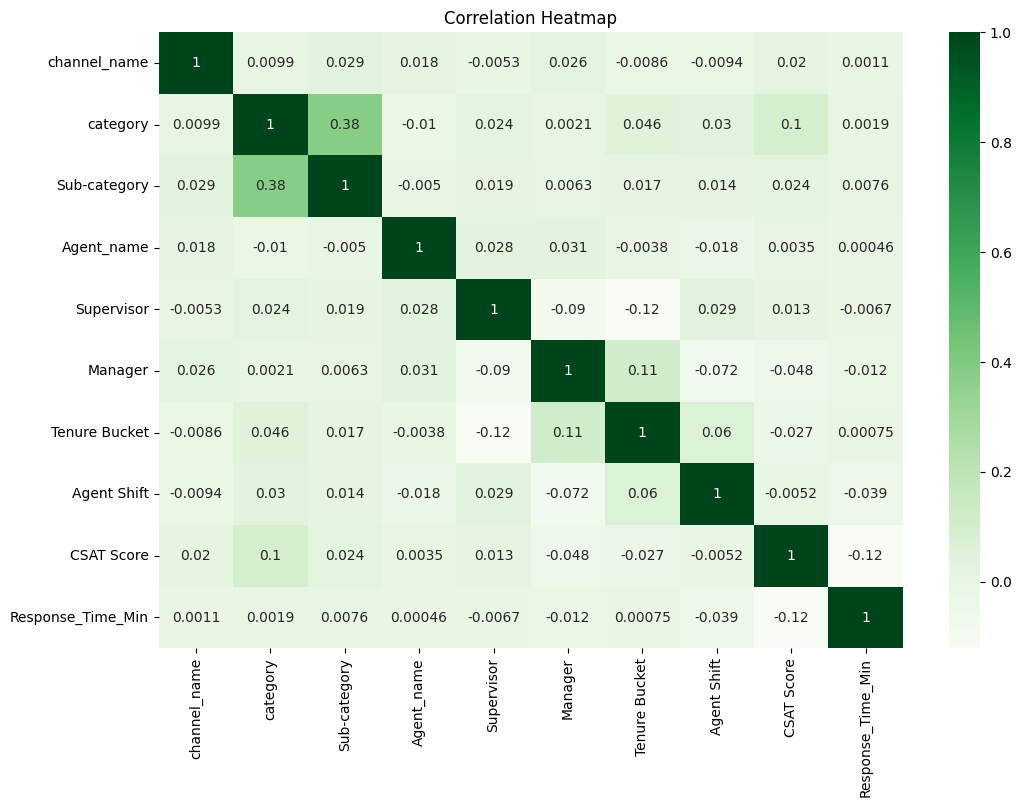

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.title("Correlation Heatmap")
plt.show()

# Model Training

In [ ]:
# Feature Selection
X = df.drop("CSAT Score", axis=1)

# Shift CSAT Score to start from 0 (required for XGBoost)
y = df["CSAT Score"] - 1

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Convert predictions back to original CSAT range
y_pred_rf_orig = y_pred_rf + 1
y_test_orig = y_test + 1

print("Random Forest Accuracy:", accuracy_score(y_test_orig, y_pred_rf_orig))
print(confusion_matrix(y_test_orig, y_pred_rf_orig))
print(classification_report(y_test_orig, y_pred_rf_orig))


Random Forest Accuracy: 0.6500902346099859
[[ 107    3    6   26  562]
 [   5    1    0    1   81]
 [  13    0    1    4  125]
 [  52    3    4   29  543]
 [ 173   12   18  114 3104]]
              precision    recall  f1-score   support

           1       0.31      0.15      0.20       704
           2       0.05      0.01      0.02        88
           3       0.03      0.01      0.01       143
           4       0.17      0.05      0.07       631
           5       0.70      0.91      0.79      3421

    accuracy                           0.65      4987
   macro avg       0.25      0.22      0.22      4987
weighted avg       0.55      0.65      0.58      4987



In [ ]:
# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Convert predictions back to original CSAT range
y_pred_xgb_orig = y_pred_xgb + 1

print("XGBoost Accuracy:", accuracy_score(y_test_orig, y_pred_xgb_orig))
print(confusion_matrix(y_test_orig, y_pred_xgb_orig))
print(classification_report(y_test_orig, y_pred_xgb_orig))

XGBoost Accuracy: 0.6769600962502507
[[  85    1    3    7  608]
 [   9    0    0    1   78]
 [  11    0    0    0  132]
 [  31    0    0    8  592]
 [ 111    2    3   22 3283]]
              precision    recall  f1-score   support

           1       0.34      0.12      0.18       704
           2       0.00      0.00      0.00        88
           3       0.00      0.00      0.00       143
           4       0.21      0.01      0.02       631
           5       0.70      0.96      0.81      3421

    accuracy                           0.68      4987
   macro avg       0.25      0.22      0.20      4987
weighted avg       0.56      0.68      0.58      4987



#Hyper Paramater Tuning


In [ ]:
# Hyperparameter Tuning - Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best RF Parameters:", grid_rf.best_params_)
print("Best RF Score (CV):", grid_rf.best_score_)


Best RF Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best RF Score (CV): 0.6823104693140795


In [ ]:
# Hyperparameter Tuning - XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

grid_xgb = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    param_grid_xgb, cv=3, scoring='accuracy'
)
grid_xgb.fit(X_train, y_train)

print("Best XGB Parameters:", grid_xgb.best_params_)
print("Best XGB Score (CV):", grid_xgb.best_score_)


Best XGB Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best XGB Score (CV): 0.6845166466105095


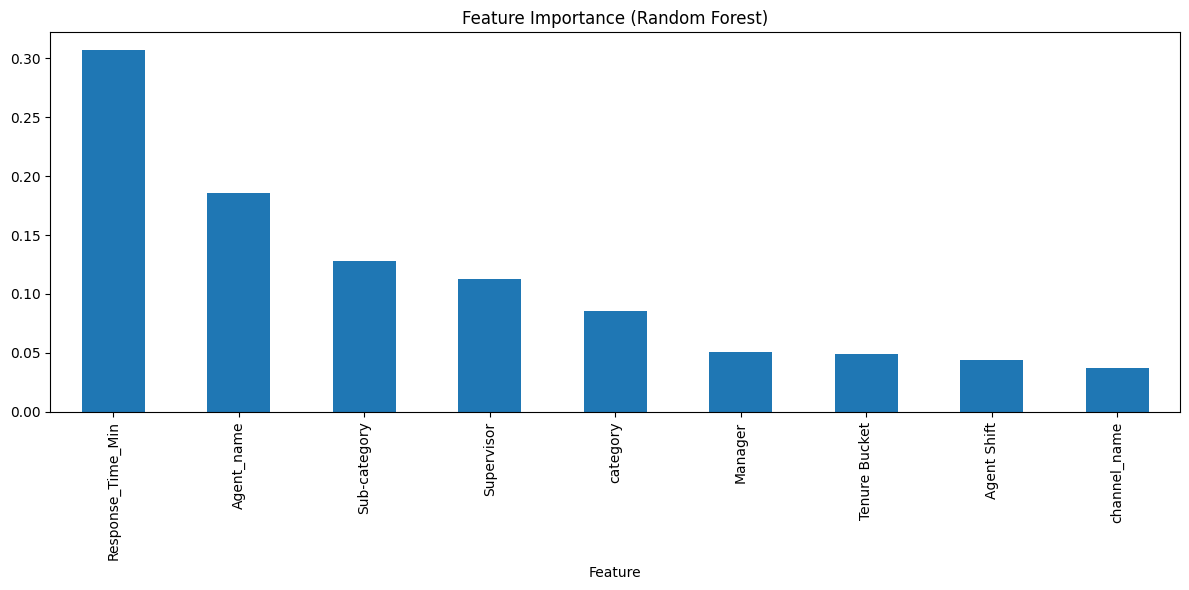

In [ ]:
# Feature Importance Visualization
importances = grid_rf.best_estimator_.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=False).plot.bar(x='Feature', figsize=(12, 6), legend=False)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

In [6]:
# Feature selection using correlation and SelectKBest

# Drop constant or irrelevant features manually
df.drop(columns=["customer_id", "ticket_id"], inplace=True, errors='ignore')

# One-hot encode categorical features before SelectKBest
df_encoded = pd.get_dummies(df.drop("CSAT Score", axis=1), drop_first=True)
y = df["CSAT Score"] - 1  # Shift labels for XGBoost

# Use SelectKBest with ANOVA F-score
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)  # Keep top 10 features
X_selected = selector.fit_transform(df_encoded, y)

# Get selected feature names
selected_features = df_encoded.columns[selector.get_support()]
X = df_encoded[selected_features]


In [7]:
# Train-test split with cleaned & reduced features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test) + 1  # Back to CSAT scale
y_test_orig = y_test + 1

print("Random Forest (After Cleaning) Accuracy:", accuracy_score(y_test_orig, y_pred_rf))
print(classification_report(y_test_orig, y_pred_rf))


Random Forest (After Cleaning) Accuracy: 0.6500902346099859
              precision    recall  f1-score   support

           1       0.31      0.15      0.20       704
           2       0.05      0.01      0.02        88
           3       0.03      0.01      0.01       143
           4       0.17      0.05      0.07       631
           5       0.70      0.91      0.79      3421

    accuracy                           0.65      4987
   macro avg       0.25      0.22      0.22      4987
weighted avg       0.55      0.65      0.58      4987



In [9]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test) + 1

print("XGBoost (After Cleaning) Accuracy:", accuracy_score(y_test_orig, y_pred_xgb))
print(classification_report(y_test_orig, y_pred_xgb))


XGBoost (After Cleaning) Accuracy: 0.6769600962502507
              precision    recall  f1-score   support

           1       0.34      0.12      0.18       704
           2       0.00      0.00      0.00        88
           3       0.00      0.00      0.00       143
           4       0.21      0.01      0.02       631
           5       0.70      0.96      0.81      3421

    accuracy                           0.68      4987
   macro avg       0.25      0.22      0.20      4987
weighted avg       0.56      0.68      0.58      4987

